In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import plot_tree


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor, BaggingClassifier, BaggingRegressor, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


In [2]:
path = "youth_data.csv"
df = pd.read_csv(path)
print(df.columns)



Index(['iralcfy', 'irmjfy', 'ircigfm', 'IRSMKLSS30N', 'iralcfm', 'irmjfm',
       'ircigage', 'irsmklsstry', 'iralcage', 'irmjage', 'mrjflag', 'alcflag',
       'tobflag', 'alcydays', 'mrjydays', 'alcmdays', 'mrjmdays', 'cigmdays',
       'smklsmdays', 'schfelt', 'tchgjob', 'avggrade', 'stndscig', 'stndsmj',
       'stndalc', 'stnddnk', 'parchkhw', 'parhlphw', 'PRCHORE2', 'PRLMTTV2',
       'parlmtsn', 'PRGDJOB2', 'PRPROUD2', 'argupar', 'YOFIGHT2', 'YOGRPFT2',
       'YOHGUN2', 'YOSELL2', 'YOSTOLE2', 'YOATTAK2', 'PRPKCIG2', 'PRMJEVR2',
       'prmjmo', 'PRALDLY2', 'YFLPKCG2', 'YFLTMRJ2', 'yflmjmo', 'YFLADLY2',
       'FRDPCIG2', 'FRDMEVR2', 'frdmjmon', 'FRDADLY2', 'talkprob', 'PRTALK3',
       'PRBSOLV2', 'PREVIOL2', 'PRVDRGO2', 'GRPCNSL2', 'PREGPGM2', 'YTHACT2',
       'DRPRVME3', 'ANYEDUC3', 'rlgattd', 'rlgimpt', 'rlgdcsn', 'rlgfrnd',
       'irsex', 'NEWRACE2', 'HEALTH2', 'eduschlgo', 'EDUSCHGRD2', 'eduskpcom',
       'imother', 'ifather', 'income', 'govtprog', 'POVERTY3', 'PDEN10',

In [3]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"'{column}': {unique_values}")

'iralcfy': [993 991   3  12  36   1 156   2  28   8  60  52   4 132  24 120   7   5
  48 180  13  43   6 104  10  96  15  69  21  25  57  14  18  20  46  19
  17   9  40  22  39  72  84 260  30 100 343  26 144 240 145 204 276  61
  45  33  37  32  11  23  47 108 107  29  54  75 250 208  58 216  50  41
  59 344  34 181  16  35  27  42  82]
'irmjfy': [991 993 228   3  52 329   2  30   4  36 168 312  15 208   1   7  12  72
 120 260  59  16  18  96 180  50 364 360 156  20  24  73 100  10  41  13
  27  17  48   5  40   9 183 252   6   8 150 142  23  51 166  60 219  14
  95 240 353  25  47 104 330 225 339 270 363  11 256  43  38 126  39  32
 152 144  22  19  80  44  34  46  35  86 344 276  45 250 336  54  58 194
  84 300 327 107 365  62  68 151 345 117 342 148  56 134 200]
'ircigfm': [91 93  1 15  3  5 30 20  7  2 10  8  4  6 22 25 18 26]
'IRSMKLSS30N': [91 93  3 10  5  1  4 12  7 29 15 21 30  2 28 25 20]
'iralcfm': [93.  91.   1.   4.   3.   2.   6.  13.   1.5 10.   7.   5.  15.  14.
  9.  

In [4]:
if df.isna().any().any():
    print("Yes")  
else:
    print("No") 

Yes


In [5]:
def impute(df):
    return df.mode().iloc[0]
for col in df.columns:
    imp_vals=impute(df[col])
    df[col].fillna(imp_vals,inplace=True)
n_after=df.isnull().sum()
imputed_columns=sum(n_after>0)
print(imputed_columns)

0


In [6]:
if df.isna().any().any():
    print("Yes")  
else:
    print("No") 

No


In [7]:
column_mapping = {
    "alcmdays" : "Alcohol_Days_Month",
    "mrjmdays" : "Marijuana_Days_Month",
    "cigmdays" : "Cigarette_Days_Month",
    "alcydays" : "Alcohol_Days_Year",
    "mrjydays" : "Marijuana_Days_Year",
    "mrjflag" : "Marijuana_Flag",
    'tobflag': 'Tobacco_Flag',
    'alcflag': 'Alcohol_Flag',
    "ircigfm" : "Cigarette_Frequency_Month",
    "irsmklsstry" : "Smokeless_Tobacco_Frequency_Month",
    "iralcage" : "Alcohol_Age_First_Use",
    "irmjage" : "Marijuana_Age_First_Use",
    "irmjfm" : "Marijuana_Frequency_Month",
    "iralcfm" : "Alcohol_Frequency_Month",
    'iralcfy':'Alcohol_frequency',
    'irmjfy':'Marijuana_freuency',
    "NEWRACE2" : "Race_Hispanicity",
    "irsex" : "Gender",
    "HEALTH2" : "Overall_Health",
    'imother': 'Mother_Presence',
    'ifather': 'Father_Presence',
    'income': 'Income_Level',
    'tchgjob': 'Teacher_Job_Performance',
    'stnddnk': 'Drinking_Standard',
     "argupar" : "Argue_with_Parent",
    "YOGRPFT2" : "Youth_Group_Fight",
    "YOFIGHT2" : "Youth_Fight_School",
    "YOHGUN2" : "Youth_Carry_Gun",
    "YOSELL2" : "Youth_Sell_Drugs",
    "govtprog" : "Govt_Programs",
    "avggrade" : "Avg_Grade",
    "stndscig" : "Students_Use_Cigarettes",
    "stndalc" : "Students_Use_Alcohol",
    "stndsmj" : "Students_Use_Marijuana",    
    "schfelt" : "School_feelings"

}

In [8]:

df.rename(columns=column_mapping, inplace=True)
df.columns

Index(['Alcohol_frequency', 'Marijuana_freuency', 'Cigarette_Frequency_Month',
       'IRSMKLSS30N', 'Alcohol_Frequency_Month', 'Marijuana_Frequency_Month',
       'ircigage', 'Smokeless_Tobacco_Frequency_Month',
       'Alcohol_Age_First_Use', 'Marijuana_Age_First_Use', 'Marijuana_Flag',
       'Alcohol_Flag', 'Tobacco_Flag', 'Alcohol_Days_Year',
       'Marijuana_Days_Year', 'Alcohol_Days_Month', 'Marijuana_Days_Month',
       'Cigarette_Days_Month', 'smklsmdays', 'School_feelings',
       'Teacher_Job_Performance', 'Avg_Grade', 'Students_Use_Cigarettes',
       'Students_Use_Marijuana', 'Students_Use_Alcohol', 'Drinking_Standard',
       'parchkhw', 'parhlphw', 'PRCHORE2', 'PRLMTTV2', 'parlmtsn', 'PRGDJOB2',
       'PRPROUD2', 'Argue_with_Parent', 'Youth_Fight_School',
       'Youth_Group_Fight', 'Youth_Carry_Gun', 'Youth_Sell_Drugs', 'YOSTOLE2',
       'YOATTAK2', 'PRPKCIG2', 'PRMJEVR2', 'prmjmo', 'PRALDLY2', 'YFLPKCG2',
       'YFLTMRJ2', 'yflmjmo', 'YFLADLY2', 'FRDPCIG2', 'FRDMEV

In [9]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"'{column}': {unique_values}")


'Alcohol_frequency': [993 991   3  12  36   1 156   2  28   8  60  52   4 132  24 120   7   5
  48 180  13  43   6 104  10  96  15  69  21  25  57  14  18  20  46  19
  17   9  40  22  39  72  84 260  30 100 343  26 144 240 145 204 276  61
  45  33  37  32  11  23  47 108 107  29  54  75 250 208  58 216  50  41
  59 344  34 181  16  35  27  42  82]
'Marijuana_freuency': [991 993 228   3  52 329   2  30   4  36 168 312  15 208   1   7  12  72
 120 260  59  16  18  96 180  50 364 360 156  20  24  73 100  10  41  13
  27  17  48   5  40   9 183 252   6   8 150 142  23  51 166  60 219  14
  95 240 353  25  47 104 330 225 339 270 363  11 256  43  38 126  39  32
 152 144  22  19  80  44  34  46  35  86 344 276  45 250 336  54  58 194
  84 300 327 107 365  62  68 151 345 117 342 148  56 134 200]
'Cigarette_Frequency_Month': [91 93  1 15  3  5 30 20  7  2 10  8  4  6 22 25 18 26]
'IRSMKLSS30N': [91 93  3 10  5  1  4 12  7 29 15 21 30  2 28 25 20]
'Alcohol_Frequency_Month': [93.  91.   1.   4. 

# BINARY CLASSIFICATION

In [10]:
bin_cl = ['Youth_Sell_Drugs','Youth_Carry_Gun','Youth_Group_Fight','Alcohol_Flag','Marijuana_Flag','Gender','Youth_Sell_Drugs', 'Govt_Programs','Students_Use_Alcohol','Argue_with_Parent']

X = df[bin_cl]
y = df['Tobacco_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
bagging_fit_bin = BaggingClassifier( n_estimators=100, random_state=42)

bagging_fit_bin .fit(X_train,y_train)
bagging_cv_score_bin = cross_val_score(bagging_fit_bin , X, y, cv=5)
print("Bagging Cross-validation scores:", bagging_cv_score_bin)
print("Mean Cross-validation accuracy - Bagging:", bagging_cv_score_bin.mean())


Bagging Cross-validation scores: [0.89909091 0.89181818 0.91272727 0.90090909 0.90818182]
Mean Cross-validation accuracy - Bagging: 0.9025454545454545


In [12]:
shrinkage_values = [0.1, 0.01,0.001, 0.0001]
best_model = None
best_acc = 0
for shrinkage in shrinkage_values:
    boosting_model_bin = AdaBoostClassifier(n_estimators=100, learning_rate=shrinkage, random_state=42)
    boosting_model_bin.fit(X_train,y_train)
    cv_scores = cross_val_score(boosting_model_bin, X, y, cv=5)  
    mean_acc = cv_scores.mean()
    print("Shrinkage :", shrinkage)
    print("Cross-Validation Scores:", cv_scores)
    print("Mean Accuracy:", mean_acc)
    print()  
    if mean_acc > best_acc:
        best_acc = mean_acc
        best_model = boosting_model_bin
print("Best Model:")
print(best_model)
print("Best Accuracy:", best_acc)

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADM

Shrinkage : 0.1
Cross-Validation Scores: [0.91454545 0.89363636 0.91363636 0.91636364 0.91636364]
Mean Accuracy: 0.9109090909090909



C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADM

Shrinkage : 0.01
Cross-Validation Scores: [0.89727273 0.89727273 0.89636364 0.89636364 0.89636364]
Mean Accuracy: 0.8967272727272727



C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADM

Shrinkage : 0.001
Cross-Validation Scores: [0.89727273 0.89727273 0.89636364 0.89636364 0.89636364]
Mean Accuracy: 0.8967272727272727



C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADM

Shrinkage : 0.0001
Cross-Validation Scores: [0.89727273 0.89727273 0.89636364 0.89636364 0.89636364]
Mean Accuracy: 0.8967272727272727

Best Model:
AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
Best Accuracy: 0.9109090909090909


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


([<matplotlib.axis.YTick at 0x27df65a7b50>,
 [Text(0, 0, 'Youth_Sell_Drugs'),
  Text(0, 1, 'Youth_Carry_Gun'),
  Text(0, 2, 'Youth_Group_Fight'),
  Text(0, 3, 'Alcohol_Flag'),
  Text(0, 4, 'Marijuana_Flag'),
  Text(0, 5, 'Gender'),
  Text(0, 6, 'Youth_Sell_Drugs'),
  Text(0, 7, 'Govt_Programs'),
  Text(0, 8, 'Students_Use_Alcohol'),
  Text(0, 9, 'Argue_with_Parent')])

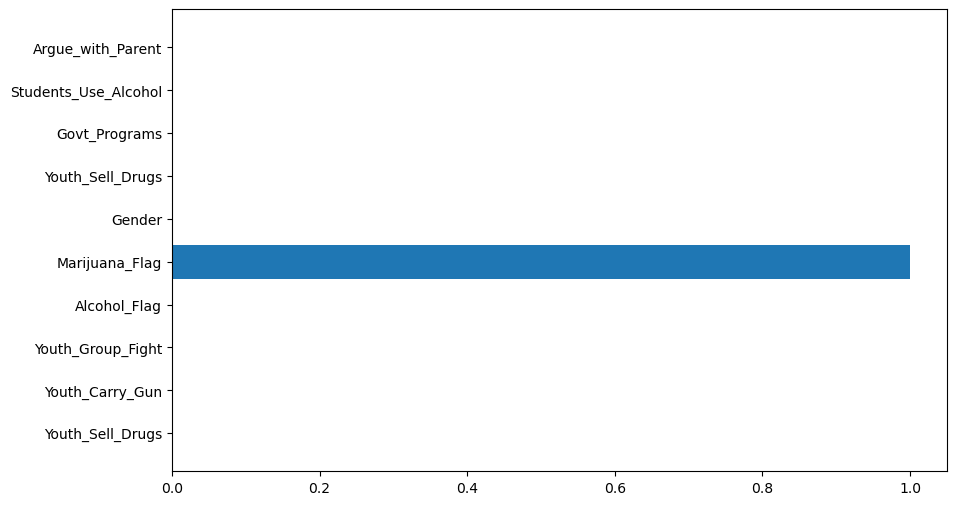

In [13]:
boosting_model_bin.fit(X_train,y_train)
importances=boosting_model_bin.feature_importances_
plt.figure(figsize=(10,6))
plt.barh(range(len(bin_cl)),importances,align="center")
plt.yticks(range(len(bin_cl)),bin_cl)

# MULTI-CLASSIFICATION

In [14]:
mul_cl = ['PDEN10','COUTYP4','Youth_Sell_Drugs','Race_Hispanicity','Tobacco_Flag','Alcohol_Flag','Marijuana_Flag']
X = df[mul_cl ]
y = df['Cigarette_Days_Month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
rf_fit_mul = RandomForestClassifier(n_estimators=100, random_state=42)
rf_score_mul = cross_val_score(rf_fit_mul, X, y, cv=5)
print("Random Forest Cross-validation scores:", rf_score_mul)
print("Mean Cross-validation accuracy -Random Forest:", rf_score_mul.mean())


Random Forest Cross-validation scores: [0.97909091 0.98181818 0.98181818 0.98272727 0.98272727]
Mean Cross-validation accuracy -Random Forest: 0.9816363636363636


In [16]:
shrinkage_values = [0.1, 0.01,0.001, 0.0001]
best_fit_mul = None
best_acc_mul = 0
for shrinkage in shrinkage_values:
    boosting_model = AdaBoostClassifier(n_estimators=100, learning_rate=shrinkage, random_state=42)
    cv_scores = cross_val_score(boosting_model, X, y, cv=5)
    mean_acc_mul = cv_scores.mean()
    print("Shrinkage (Learning Rate):", shrinkage)
    print("Cross-Validation Scores:", cv_scores)
    print("Mean Accuracy:", mean_acc_mul)
    print()
    if mean_acc_mul > best_acc_mul:
        best_acc_mul = mean_acc_mul
        best_fit_mul = boosting_model
print("Best Model:")
print(best_fit_mul)
print("Best Accuracy:", best_acc_mul)


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADM

Shrinkage (Learning Rate): 0.1
Cross-Validation Scores: [0.98363636 0.98363636 0.98272727 0.98363636 0.98272727]
Mean Accuracy: 0.9832727272727272



C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADM

Shrinkage (Learning Rate): 0.01
Cross-Validation Scores: [0.98363636 0.98363636 0.98363636 0.98363636 0.98272727]
Mean Accuracy: 0.9834545454545454



C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADM

Shrinkage (Learning Rate): 0.001
Cross-Validation Scores: [0.98363636 0.98363636 0.98363636 0.98363636 0.98272727]
Mean Accuracy: 0.9834545454545454



C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ADM

Shrinkage (Learning Rate): 0.0001
Cross-Validation Scores: [0.98363636 0.98363636 0.98363636 0.98363636 0.98272727]
Mean Accuracy: 0.9834545454545454

Best Model:
AdaBoostClassifier(learning_rate=0.01, n_estimators=100, random_state=42)
Best Accuracy: 0.9834545454545454


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


<BarContainer object of 7 artists>

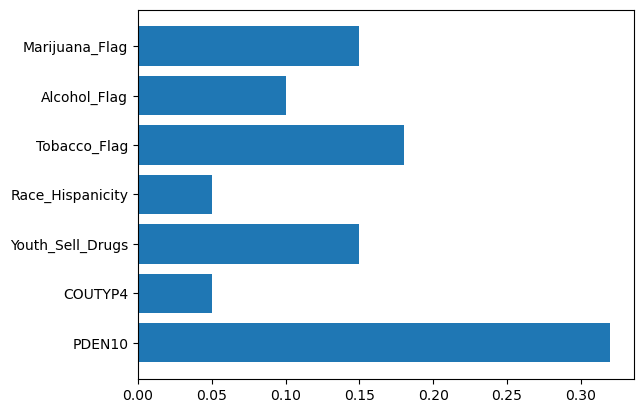

In [17]:
best_fit_mul.fit(X,y)
importances=best_fit_mul.feature_importances_
plt.barh(mul_cl ,importances)

# REGRESSION

In [18]:
reg_cl  = ['Students_Use_Cigarettes','Students_Use_Alcohol','Father_Presence', 'Mother_Presence', 'Overall_Health', 'Gender', 'School_feelings', 'Race_Hispanicity','Avg_Grade','Students_Use_Marijuana','Youth_Fight_School','Youth_Sell_Drugs']

X = df[reg_cl]
y = df['Cigarette_Days_Month']

In [19]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_reg = DecisionTreeRegressor(random_state=42)
dt_cv_scores = cross_val_score(dt_reg, X, y, cv=5, scoring='neg_mean_squared_error')
print("Decision Tree Cross-Validation MSE:", -dt_cv_scores.mean())




Decision Tree Cross-Validation MSE: 0.44610221798336996


In [20]:
shrinkage_values = [0.1, 0.01,0.001, 0.0001]

for i in shrinkage_values:
    gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=i, random_state=42)
    gb_cv_scores = cross_val_score(gb_reg, X, y, cv=5, scoring='neg_mean_squared_error')
    print("Gradient Boosting Cross-Validation MSE:", -gb_cv_scores.mean(),'for shrinkage value',i)


Gradient Boosting Cross-Validation MSE: 0.24545287665207383 for shrinkage value 0.1
Gradient Boosting Cross-Validation MSE: 0.2423058777454329 for shrinkage value 0.01
Gradient Boosting Cross-Validation MSE: 0.24894166859768174 for shrinkage value 0.001
Gradient Boosting Cross-Validation MSE: 0.25046272256687113 for shrinkage value 0.0001


In [21]:

mse_values = {
    "Gradient Boosting": min(-gb_cv_scores),
    "Decision Tree": min(-dt_cv_scores)
}

best_model = min(mse_values, key=mse_values.get)
best_mse = mse_values[best_model]

print("The Best Model is:", best_model)
print("MSE of the Best Model is:", best_mse)


The Best Model is: Gradient Boosting
MSE of the Best Model is: 0.19517416281627137


([<matplotlib.axis.YTick at 0x27df71b9f10>,
 [Text(0, 0, 'Students_Use_Cigarettes'),
  Text(0, 1, 'Students_Use_Alcohol'),
  Text(0, 2, 'Father_Presence'),
  Text(0, 3, 'Mother_Presence'),
  Text(0, 4, 'Overall_Health'),
  Text(0, 5, 'Gender'),
  Text(0, 6, 'School_feelings'),
  Text(0, 7, 'Race_Hispanicity'),
  Text(0, 8, 'Avg_Grade'),
  Text(0, 9, 'Students_Use_Marijuana'),
  Text(0, 10, 'Youth_Fight_School'),
  Text(0, 11, 'Youth_Sell_Drugs')])

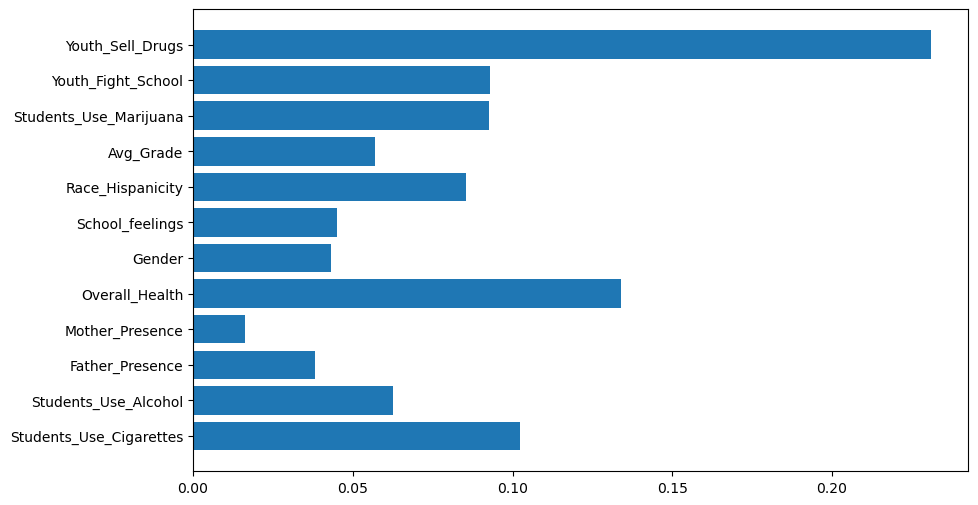

In [22]:
model=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X,y)
importances=model.feature_importances_
plt.figure(figsize=(10,6))
plt.barh(range(len(reg_cl)),importances,align="center")
plt.yticks(range(len(reg_cl)),reg_cl)

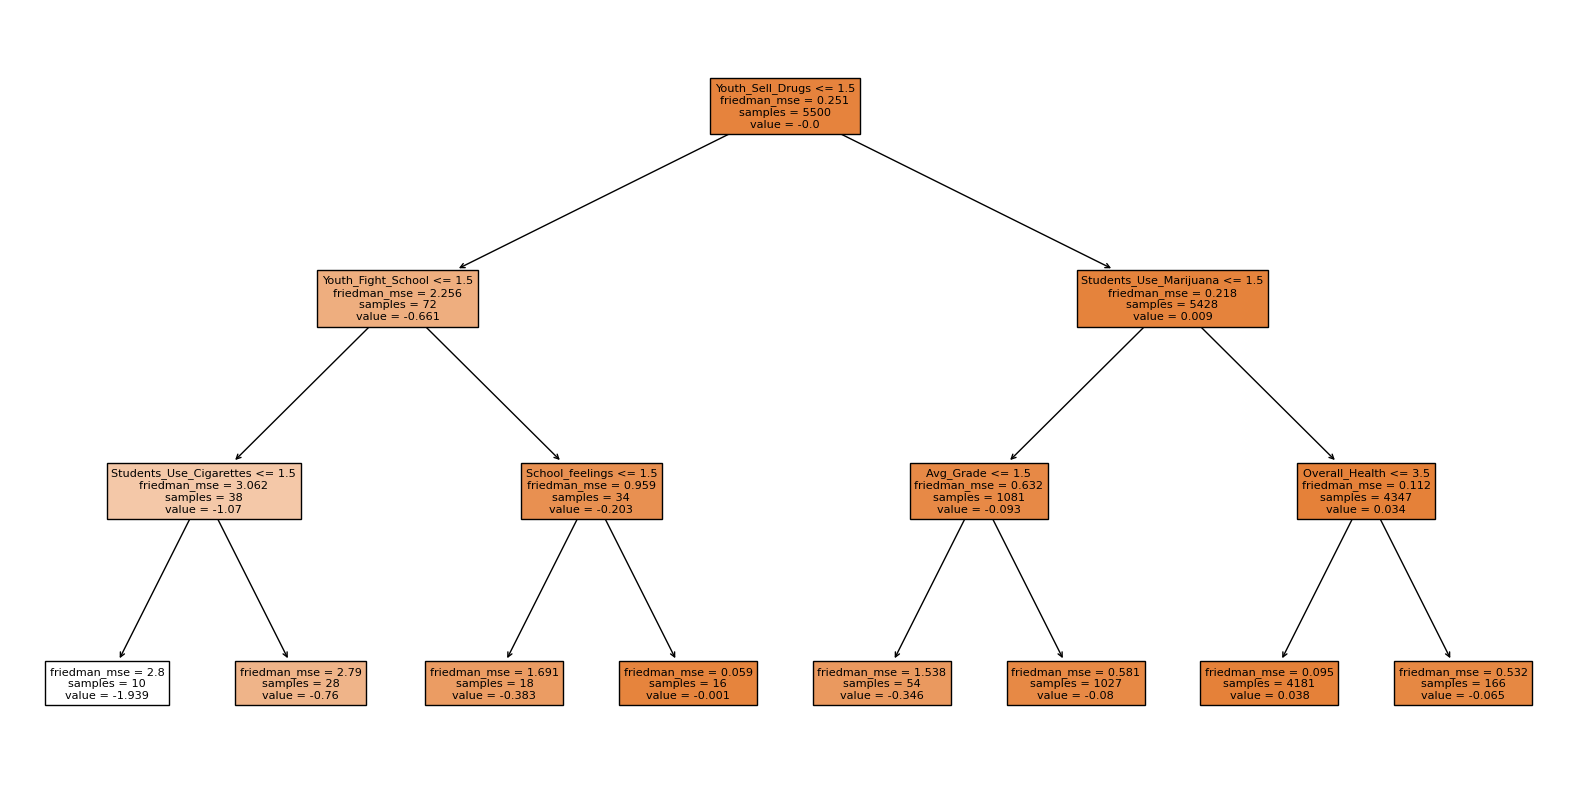

In [23]:



plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0][0], feature_names=reg_cl , filled=True)
plt.show()


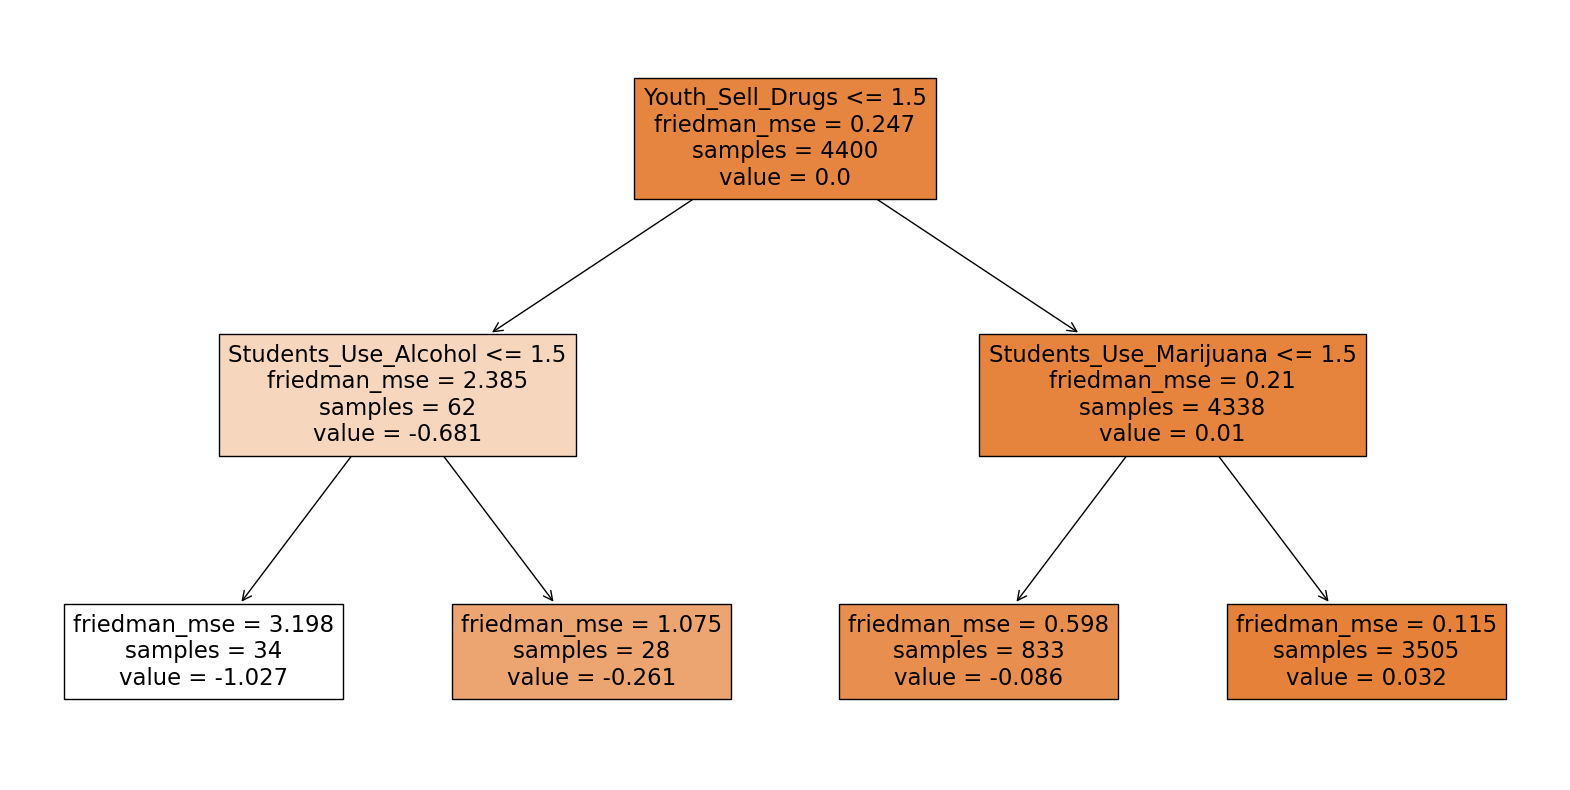

In [24]:

gb_reg_prune = GradientBoostingRegressor(n_estimators=100, 
                                                max_depth=2, 
                                                min_samples_split=4, 
                                                min_samples_leaf=6, 
                                                random_state=42)
gb_reg_prune.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(gb_reg_prune.estimators_[0][0], feature_names=reg_cl, filled=True)
plt.show()
